In [83]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import torch
from torch.utils.data import DataLoader, TensorDataset
from torch import nn
import torch.optim as optim

from sklearn.metrics import precision_score, f1_score, balanced_accuracy_score

DEVICE = torch.device("cpu")  # Try "cuda" to train on GPU

In [84]:
data = pd.read_csv('../Databases/BTC/BTC-USD.csv')

In [85]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3631,2024-08-26,64342.226563,64489.707031,62849.558594,62880.660156,62880.660156,27682040631
3632,2024-08-27,62879.707031,63210.796875,58116.750000,59504.132813,59504.132813,39103882198
3633,2024-08-28,59507.925781,60236.449219,57890.675781,59027.625000,59027.625000,40289564698
3634,2024-08-29,59027.468750,61184.082031,58786.226563,59388.179688,59388.179688,32224990582


In [86]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3636.000000,3636.000000,3636.000000,3636.000000,3636.000000,3.636000e+03
mean,17608.310300,18009.497204,17179.830799,17623.401260,17623.401260,1.756189e+10
std,19463.123079,19900.566388,18983.044122,19471.542851,19471.542851,1.919665e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,1132.057526,1173.004975,1110.959991,1141.170044,1141.170044,2.823775e+08
50%,9094.416504,9275.144043,8851.578613,9120.777832,9120.777832,1.373762e+10
75%,29000.474121,29380.991211,28448.267090,29002.867676,29002.867676,2.844001e+10
max,73079.375000,73750.070313,71334.093750,73083.500000,73083.500000,3.509679e+11


In [87]:
data['Close']

0         457.334015
1         424.440002
2         394.795990
3         408.903992
4         398.821014
            ...     
3631    62880.660156
3632    59504.132813
3633    59027.625000
3634    59388.179688
3635    59528.664063
Name: Close, Length: 3636, dtype: float64

<Axes: >

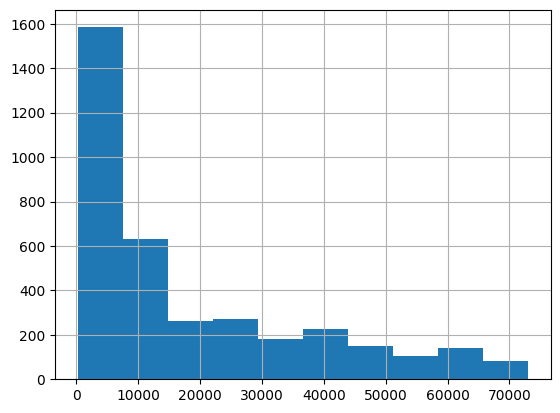

In [88]:
data['Close'].hist()

<Axes: >

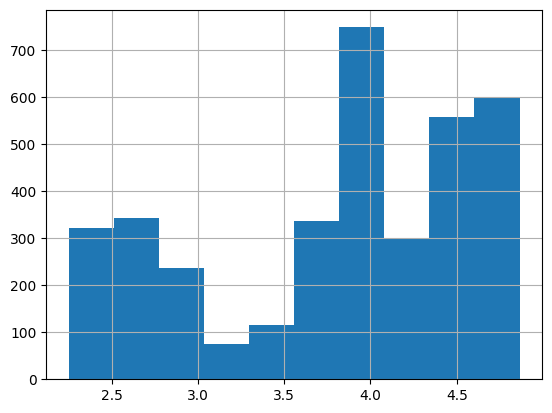

In [89]:
data['Close'].apply(np.log10).hist()

In [90]:
adj_equals_close = data['Adj Close'] == data['Close']
sum(adj_equals_close)

3636

In [91]:
data = data.drop('Adj Close', axis=1)

In [92]:
data

,Date,Open,High,Low,Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...,...
3631,2024-08-26,64342.226563,64489.707031,62849.558594,62880.660156,27682040631
3632,2024-08-27,62879.707031,63210.796875,58116.750000,59504.132813,39103882198
3633,2024-08-28,59507.925781,60236.449219,57890.675781,59027.625000,40289564698
3634,2024-08-29,59027.468750,61184.082031,58786.226563,59388.179688,32224990582


In [93]:
data['Close_log'] = data['Close'].apply(np.log10)
data

,Date,Open,High,Low,Close,Volume,Close_log
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2.660234
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2.627816
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2.596373
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2.611621
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2.600778
...,...,...,...,...,...,...,...
3631,2024-08-26,64342.226563,64489.707031,62849.558594,62880.660156,27682040631,4.798517
3632,2024-08-27,62879.707031,63210.796875,58116.750000,59504.132813,39103882198,4.774547
3633,2024-08-28,59507.925781,60236.449219,57890.675781,59027.625000,40289564698,4.771055
3634,2024-08-29,59027.468750,61184.082031,58786.226563,59388.179688,32224990582,4.773700


In [94]:
data['Difference'] = data['Close'] - data['Open']
data

,Date,Open,High,Low,Close,Volume,Close_log,Difference
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2.660234,-8.529999
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2.627816,-32.419983
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2.596373,-29.307007
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2.611621,14.230988
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2.600778,-9.263977
...,...,...,...,...,...,...,...,...
3631,2024-08-26,64342.226563,64489.707031,62849.558594,62880.660156,27682040631,4.798517,-1461.566407
3632,2024-08-27,62879.707031,63210.796875,58116.750000,59504.132813,39103882198,4.774547,-3375.574218
3633,2024-08-28,59507.925781,60236.449219,57890.675781,59027.625000,40289564698,4.771055,-480.300781
3634,2024-08-29,59027.468750,61184.082031,58786.226563,59388.179688,32224990582,4.773700,360.710938


<Axes: >

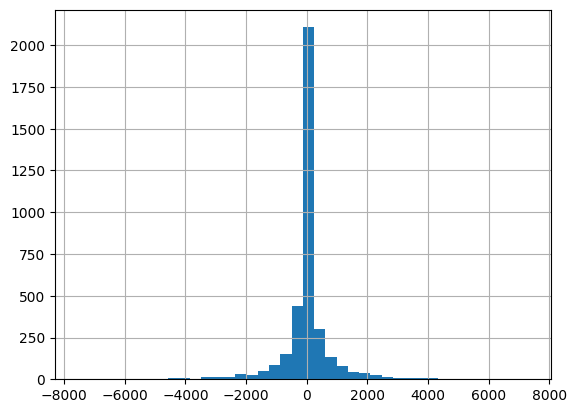

In [95]:
data['Difference'].hist(bins=40)

In [96]:
data['Difference_Percentage'] = data['Close'] / data['Open'] - 1
data

,Date,Open,High,Low,Close,Volume,Close_log,Difference,Difference_Percentage
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2.660234,-8.529999,-0.018310
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2.627816,-32.419983,-0.070963
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2.596373,-29.307007,-0.069104
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2.611621,14.230988,0.036058
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2.600778,-9.263977,-0.022701
...,...,...,...,...,...,...,...,...,...
3631,2024-08-26,64342.226563,64489.707031,62849.558594,62880.660156,27682040631,4.798517,-1461.566407,-0.022716
3632,2024-08-27,62879.707031,63210.796875,58116.750000,59504.132813,39103882198,4.774547,-3375.574218,-0.053683
3633,2024-08-28,59507.925781,60236.449219,57890.675781,59027.625000,40289564698,4.771055,-480.300781,-0.008071
3634,2024-08-29,59027.468750,61184.082031,58786.226563,59388.179688,32224990582,4.773700,360.710938,0.006111


<Axes: >

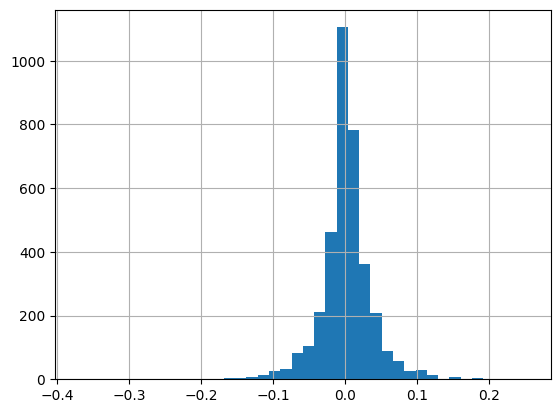

In [97]:
data['Difference_Percentage'].hist(bins=40)

In [98]:
data.describe()

,Open,High,Low,Close,Volume,Close_log,Difference,Difference_Percentage
count,3636.000000,3636.000000,3636.000000,3636.000000,3.636000e+03,3636.000000,3636.000000,3636.000000
mean,17608.310300,18009.497204,17179.830799,17623.401260,1.756189e+10,3.794419,15.090960,0.001940
std,19463.123079,19900.566388,18983.044122,19471.542851,1.919665e+10,0.782740,884.657221,0.036423
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,2.250671,-7563.996094,-0.371869
25%,1132.057526,1173.004975,1110.959991,1141.170044,2.823775e+08,3.057347,-103.439453,-0.012749
50%,9094.416504,9275.144043,8851.578613,9120.777832,1.373762e+10,3.960032,1.444985,0.001176
75%,29000.474121,29380.991211,28448.267090,29002.867676,2.844001e+10,4.462441,129.155884,0.016828
max,73079.375000,73750.070313,71334.093750,73083.500000,3.509679e+11,4.863819,7309.636719,0.254702


In [99]:
data['Following_Day_Difference_Percentage'] = data['Difference_Percentage'].shift(-1)
data

,Date,Open,High,Low,Close,Volume,Close_log,Difference,Difference_Percentage,Following_Day_Difference_Percentage
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2.660234,-8.529999,-0.018310,-0.070963
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2.627816,-32.419983,-0.070963,-0.069104
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2.596373,-29.307007,-0.069104,0.036058
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2.611621,14.230988,0.036058,-0.022701
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2.600778,-9.263977,-0.022701,0.007647
...,...,...,...,...,...,...,...,...,...,...
3631,2024-08-26,64342.226563,64489.707031,62849.558594,62880.660156,27682040631,4.798517,-1461.566407,-0.022716,-0.053683
3632,2024-08-27,62879.707031,63210.796875,58116.750000,59504.132813,39103882198,4.774547,-3375.574218,-0.053683,-0.008071
3633,2024-08-28,59507.925781,60236.449219,57890.675781,59027.625000,40289564698,4.771055,-480.300781,-0.008071,0.006111
3634,2024-08-29,59027.468750,61184.082031,58786.226563,59388.179688,32224990582,4.773700,360.710938,0.006111,0.002597


In [100]:
cleaned_data = data.dropna()
cleaned_data

,Date,Open,High,Low,Close,Volume,Close_log,Difference,Difference_Percentage,Following_Day_Difference_Percentage
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2.660234,-8.529999,-0.018310,-0.070963
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2.627816,-32.419983,-0.070963,-0.069104
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2.596373,-29.307007,-0.069104,0.036058
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2.611621,14.230988,0.036058,-0.022701
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2.600778,-9.263977,-0.022701,0.007647
...,...,...,...,...,...,...,...,...,...,...
3630,2024-08-25,64176.367188,64996.421875,63833.519531,64333.542969,18827683555,4.808437,157.175781,0.002449,-0.022716
3631,2024-08-26,64342.226563,64489.707031,62849.558594,62880.660156,27682040631,4.798517,-1461.566407,-0.022716,-0.053683
3632,2024-08-27,62879.707031,63210.796875,58116.750000,59504.132813,39103882198,4.774547,-3375.574218,-0.053683,-0.008071
3633,2024-08-28,59507.925781,60236.449219,57890.675781,59027.625000,40289564698,4.771055,-480.300781,-0.008071,0.006111


# Model

In [47]:
def load_data(data):
    X = data[['Open', 'High', 'Low', 'Close', 'Volume', 'Close_log', 'Difference', 'Difference_Percentage']]
    Y = data['Following_Day_Difference_Percentage']

    total_lines = len(X)
    train_lines = int(total_lines * 0.8)

    X_train = X[:train_lines]
    y_train = Y[:train_lines]
    X_test = X[train_lines:]
    y_test = Y[train_lines:]

    return X_train.reset_index(drop=True), y_train.reset_index(drop=True), X_test.reset_index(drop=True), y_test.reset_index(drop=True)

In [48]:
train_features, train_labels, test_features, test_labels = load_data(cleaned_data)

In [49]:
train_features.shape, train_labels.shape, test_features.shape, test_labels.shape

((2908, 8), (2908,), (727, 8), (727,))

In [53]:
SEQUENCE_LENGTH = 7

In [54]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(train_features)
X_test = scaler.fit_transform(test_features)

# Reshape data into sequences
def create_sequences(data, labels, sequence_length):
    sequences = []
    seq_labels = []
    
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        label = labels[i+sequence_length-1]
        sequences.append(seq)
        seq_labels.append(label)
    
    return np.array(sequences), np.array(seq_labels)

X_train, y_train = create_sequences(X_train, train_labels, SEQUENCE_LENGTH)
X_test, y_test = create_sequences(X_test, test_labels, SEQUENCE_LENGTH)

X_train = np.transpose(X_train, (0, 2, 1))
X_test = np.transpose(X_test, (0, 2, 1))

# Convert data to PyTorch tensors
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f'Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}')
print(f'Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}')

Training data shape: (2901, 8, 7), Training labels shape: (2901,)
Testing data shape: (720, 8, 7), Testing labels shape: (720,)


In [56]:
class PEN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(PEN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm1d(128)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2, padding=0)

        self.conv2 = nn.Conv1d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm1d(128)

        self.conv3 = nn.Conv1d(in_channels=128, out_channels=128, kernel_size=2, stride=1, padding=1)
        self.bn3 = nn.BatchNorm1d(128)
        
        # LSTM layers
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=2, batch_first=True)
        
        # Fully connected layers
        self.fc = nn.Linear(hidden_size + 128, 1)

    def forward(self, x):
        # Convolutional path
        x_cnn = self.conv1(x)
        x_cnn = self.bn1(x_cnn)
        x_cnn = self.relu(x_cnn)
        x_cnn = self.pool(x_cnn)

        x_cnn = self.conv2(x_cnn)
        x_cnn = self.bn2(x_cnn)
        x_cnn = self.relu(x_cnn)
        x_cnn = self.pool(x_cnn)

        x_cnn = self.conv3(x_cnn)
        x_cnn = self.bn3(x_cnn)
        x_cnn = self.relu(x_cnn)
        x_cnn = self.pool(x_cnn)
        
        x_cnn = x_cnn.mean(dim=-1)  # Global Average Pooling

        # LSTM path
        x_lstm, _ = self.lstm(x.transpose(1, 2))  # Transpose to match LSTM input shape
        x_lstm = x_lstm[:, -1, :]  # Take the last output of the sequence

        # Concatenate CNN and LSTM paths
        x = torch.cat((x_cnn, x_lstm), dim=1)

        # Fully connected layer
        x = self.fc(x)
        return x.squeeze()

In [62]:
def compute_mse(loader, model):
    model.eval()
    total_mse = 0
    with torch.no_grad():
        for x_batch, y_batch in loader:
            data, labels = x_batch.to(DEVICE), y_batch.to(DEVICE)
            outputs = model(data)
            mse = torch.mean((outputs - labels) ** 2).item()
            total_mse += mse
    model.train()
    return total_mse / len(loader)

In [73]:
def train(model, train_loader, test_loader, criterion, optimizer, num_epochs, verbose=False):
    model.train()
    total_training_time = 0
    times = []
    train_losses = []
    train_mses = []  # Mean Squared Error for training
    test_mses = []   # Mean Squared Error for testing
    
    for epoch in range(num_epochs):
        start_epoch_time = time.time()
        total_loss = 0

        for x_batch, y_batch in train_loader:
            data, labels = x_batch.to(DEVICE), y_batch.to(DEVICE).float()
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        avg_loss = total_loss / len(train_loader)
        end_epoch_time = time.time()
        epoch_time = end_epoch_time - start_epoch_time
        total_training_time += epoch_time
        
        # Compute training and testing MSE
        train_mse = compute_mse(train_loader, model)
        test_mse = compute_mse(test_loader, model)
        
        train_mses.append(train_mse)
        test_mses.append(test_mse)
        train_losses.append(avg_loss)
        times.append(epoch_time)

        if verbose:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_loss:.10f}, Train MSE: {train_mse:.10f}, \
            Test MSE: {test_mse:.10f}, Time: {epoch_time:.2f} seconds')

    if verbose:
        print(f'Total Training Time: {total_training_time:.2f} seconds')

    return train_losses, train_mses, test_mses


In [74]:
# Define model, criterion, and optimizer
input_size = X_train.shape[1]
hidden_size = 128

model = PEN(input_size, hidden_size).to(DEVICE)

In [75]:

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [77]:
train_losses, train_mses, test_mses = train(model, train_loader, test_loader, criterion, optimizer, 1000, verbose=True)

Epoch [1/1000], Train Loss: 0.0001041667, Train MSE: 0.0000436295,             Test MSE: 0.0001404836, Time: 1.18 seconds
Epoch [2/1000], Train Loss: 0.0000923318, Train MSE: 0.0000687160,             Test MSE: 0.0001142291, Time: 1.20 seconds
Epoch [3/1000], Train Loss: 0.0000862589, Train MSE: 0.0001422160,             Test MSE: 0.0001724184, Time: 1.23 seconds
Epoch [4/1000], Train Loss: 0.0001702891, Train MSE: 0.0002665287,             Test MSE: 0.0002867887, Time: 1.20 seconds
Epoch [5/1000], Train Loss: 0.0000906945, Train MSE: 0.0001308016,             Test MSE: 0.0001706362, Time: 1.26 seconds
Epoch [6/1000], Train Loss: 0.0001313415, Train MSE: 0.0002129148,             Test MSE: 0.0002197490, Time: 1.26 seconds
Epoch [7/1000], Train Loss: 0.0001068258, Train MSE: 0.0000131957,             Test MSE: 0.0000590506, Time: 1.27 seconds
Epoch [8/1000], Train Loss: 0.0000360170, Train MSE: 0.0000465826,             Test MSE: 0.0000707639, Time: 1.28 seconds
Epoch [9/1000], Train Lo

In [81]:
def plot_metrics(train, test, title, metric):
    # summarize history for accuracy
    plt.plot(train)
    plt.plot(test)
    plt.title(title)
    plt.ylabel(metric)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

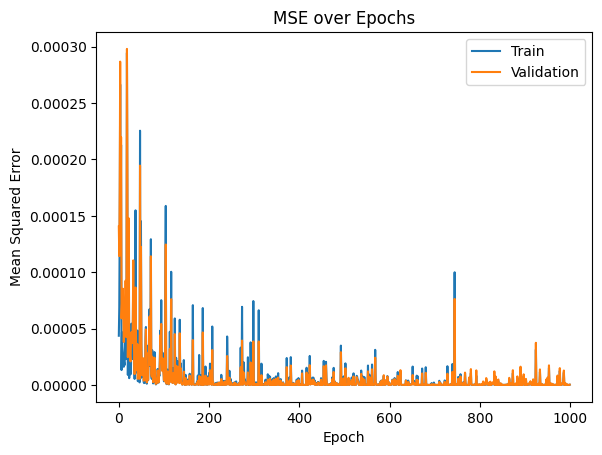

In [82]:
plot_metrics(train_mses, test_mses, 'MSE over Epochs', 'Mean Squared Error')

In [150]:
print(np.sqrt(test_mses[-1]) * 100, '%')

0.046612084836225094 %


In [139]:
last7 = cleaned_data.tail(7)
last7

,Date,Open,High,Low,Close,Volume,Close_log,Difference,Difference_Percentage,Following_Day_Difference_Percentage
3628,2024-08-23,60380.953125,64947.062500,60372.050781,64094.355469,42530509233,4.806820,3713.402344,0.061500,0.001172
3629,2024-08-24,64103.871094,64513.789063,63619.917969,64178.992188,21430585163,4.807393,75.121094,0.001172,0.002449
3630,2024-08-25,64176.367188,64996.421875,63833.519531,64333.542969,18827683555,4.808437,157.175781,0.002449,-0.022716
3631,2024-08-26,64342.226563,64489.707031,62849.558594,62880.660156,27682040631,4.798517,-1461.566407,-0.022716,-0.053683
3632,2024-08-27,62879.707031,63210.796875,58116.750000,59504.132813,39103882198,4.774547,-3375.574218,-0.053683,-0.008071
3633,2024-08-28,59507.925781,60236.449219,57890.675781,59027.625000,40289564698,4.771055,-480.300781,-0.008071,0.006111
3634,2024-08-29,59027.468750,61184.082031,58786.226563,59388.179688,32224990582,4.773700,360.710938,0.006111,0.002597


In [141]:
# Extract the last 7 sequences
last7_sequences = last7[['Open', 'High', 'Low', 'Close', 'Volume', 'Close_log', 'Difference', 'Difference_Percentage']].values

# Standardize the data
last7_sequences = scaler.transform(last7_sequences)

# Reshape the data into sequences (assuming SEQUENCE_LENGTH = 7)
# In this case, you don't need to create sequences as you are using the entire last7 as input

# Reshape to match model input shape (batch_size, num_features, sequence_length)
last7_sequences = np.expand_dims(last7_sequences.T, axis=0)

# Convert to PyTorch tensor and move to the appropriate device
x_pred = torch.tensor(last7_sequences, dtype=torch.float32).to(DEVICE)
x_pred.shape

C:\Users\tulio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


torch.Size([1, 8, 7])

In [143]:
# Set the model to evaluation mode
model.eval()

# Make predictions
with torch.no_grad():
    prediction = model(x_pred)

# Convert the prediction to numpy (if needed) and display it
prediction = prediction.cpu().numpy()
print("Predicted Following Day Difference Percentage:", prediction * 100, "%")

Predicted Following Day Difference Percentage: -0.06074566626921296 %
